In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# file path
path = r'/Users/elliothaigh/05-2023 Instacart Basket Analysis'

In [4]:
# import data set
ords_prods_merge =pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_4.8.pkl'))

In [5]:
ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order,spend_flag,avg_days,frequency_flag
0,2539329,1,1,2,8,NaN,Yes,196.0,1.0,0.0,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,No,196.0,1.0,1.0,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,No,196.0,1.0,1.0,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,No,196.0,1.0,1.0,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,No,196.0,1.0,1.0,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


# Exercise instructions

<Axes: >

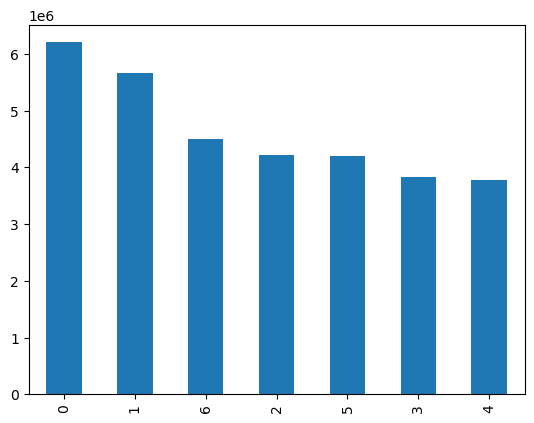

In [6]:
# Bar chart for orders by day of week
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

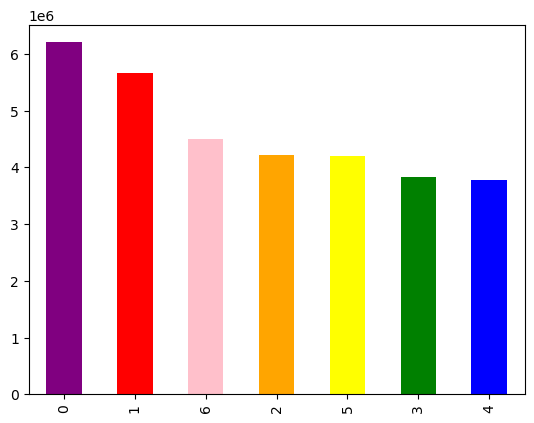

In [7]:
# save bar chart as bar
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [8]:
# export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

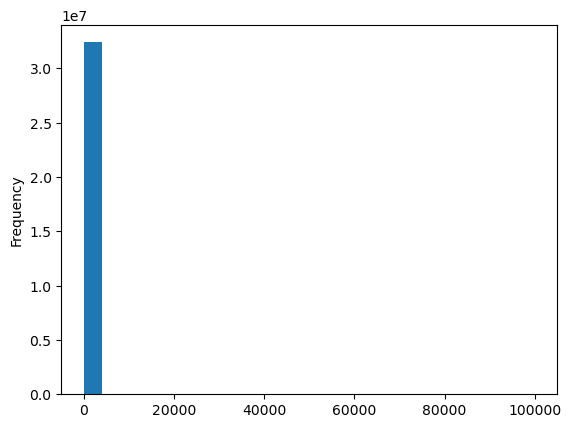

In [9]:
# Histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

Outliers have caused the histogram to be signficantly skewed. We need to explore why this has occured

In [10]:
# examine statistics for prices
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

While the mean is 11.98, the maximum price is 99,999 which is causing disruption to our histogram.

<Axes: xlabel='prices', ylabel='prices'>

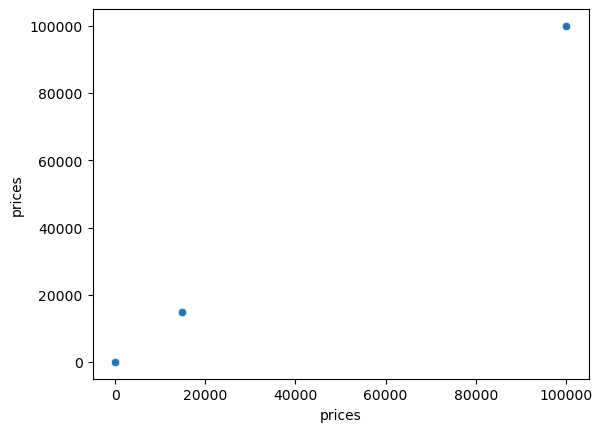

In [11]:
# We can explore this further with our scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [12]:
# We can see here that there are 5217 rows with observations over with prices over $100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order,spend_flag,avg_days,frequency_flag
10030345,912404,17,12,2,14,5.0,No,21553.0,5.0,0.0,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,No,21553.0,3.0,1.0,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,No,21553.0,6.0,0.0,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,No,21553.0,3.0,1.0,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,No,21553.0,9.0,0.0,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,No,33664.0,1.0,0.0,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,No,33664.0,1.0,1.0,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,No,33664.0,25.0,0.0,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,No,33664.0,8.0,0.0,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [13]:
# mark these outlier values as missing
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

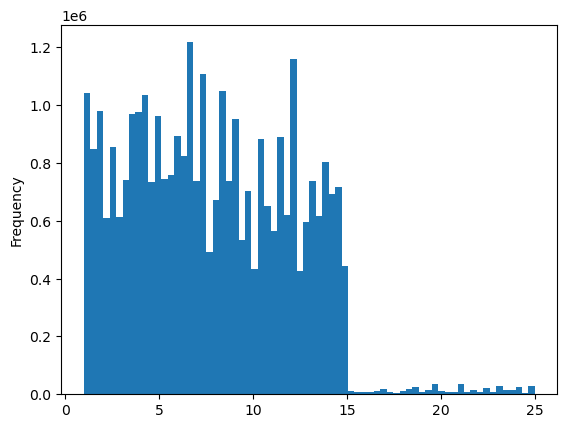

In [14]:
# Recheck our histogram
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [15]:
# export histogram 
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [16]:
# creating a sample 
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [17]:
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [18]:
len(ords_prods_merge)

32404859

In [19]:
len(big) + len (small)

32404859

In [20]:
df_2 = small[['order_day_of_week','prices']]

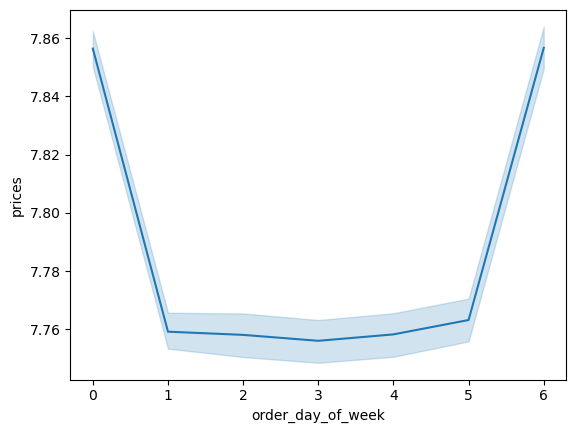

In [21]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

# Task Part 2

In [22]:
# import latest data set
cust_ords_prods =pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merge.pkl'))

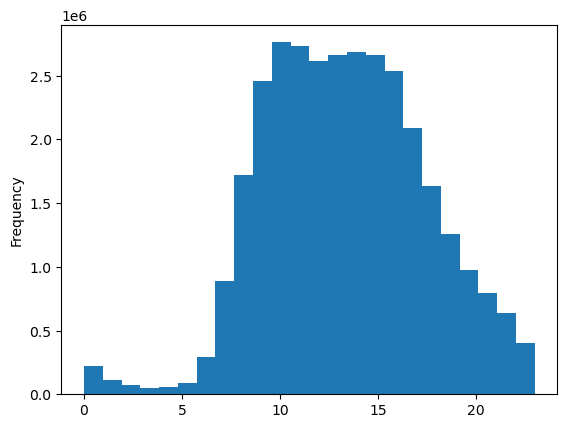

In [35]:
# histogram showing the distribution of orders by hour of the day
hist_ords_by_hour = cust_ords_prods['order_hour_of_day'].plot.hist(bins = 24)

We can see here the distribution of orders throughout the day. The quietest period is during the early morning hours and they start to increase from 6:00 until they peak around midday before steadily declining around 16:00 into the evening.

In [47]:
# export histogram chart
hist_ords_by_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ords_by_hour.png'))

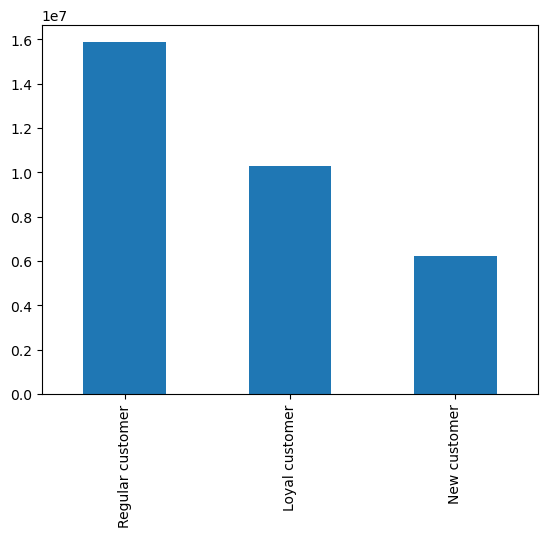

In [36]:
# bar chart showing the distribution of customers by loyaly 
hist_cust_loyal = cust_ords_prods['loyalty_flag'].value_counts().plot.bar()

In [45]:
# export bar chart
hist_cust_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_cust_loyal.png'))

In [26]:
df3 = small[['prices', 'order_hour_of_day']]

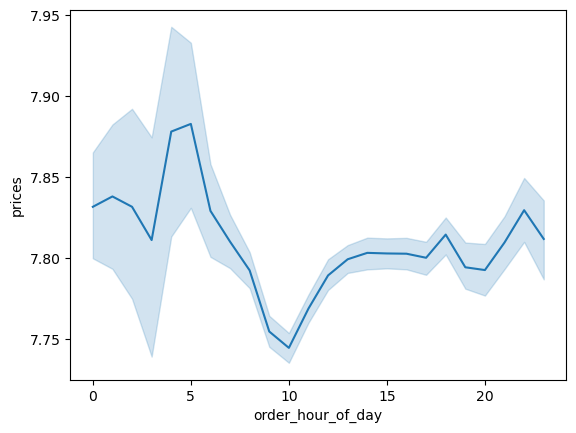

In [37]:
# line graph showing average price of purchase by hour of the day
line_prices_by_hour = sns.lineplot(data = df3, x = 'order_hour_of_day',y = 'prices')

In [46]:
# export line graph
line_prices_by_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_by_hour.png'))

In [28]:
# creating a sample of cust_ords_prods
np.random.seed(4)
dev = np.random.rand(len(cust_ords_prods)) <= 0.7

In [31]:
big_2 = cust_ords_prods[dev]
small_2 = cust_ords_prods[~dev]

In [32]:
df4 = small_2[['age', 'n_dependants']]

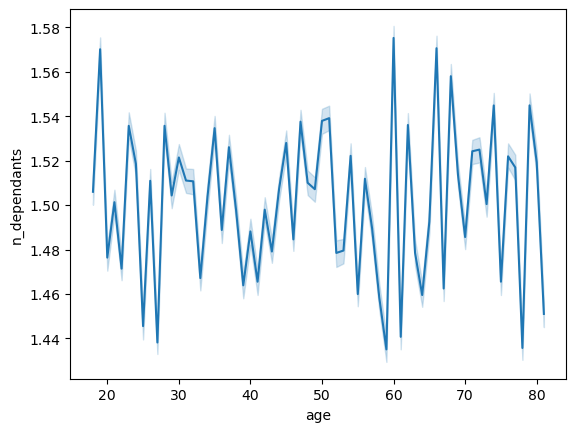

In [38]:
# line graph showing customers age against number of dependants 
line_dependants_by_age = sns.lineplot(data = df4, x = 'age',y = 'n_dependants')

There doesnt appear to be much correlation between age and the number of dependants. There is perhaps slightly higher number of dependants for those aged 60+ but the differences are negligible.

In [48]:
# export line graph
line_dependants_by_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependants_by_age.png'))

In [41]:
df5 = small_2[['age', 'income']]

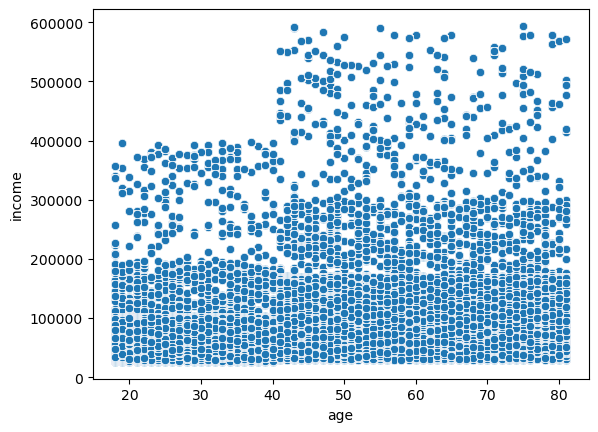

In [49]:
# scatterplot showing customers age against income 
scat_age_income = sns.scatterplot(x = 'age', y = 'income',data = cust_ords_prods)

The scatterplot is very cluttered and perhaps not the best visual to display the data here. However, we can see that there are a higher rate of plots making over $40,000 for those aged 40 and over. There general trend appears to be that there is a positive corelation between age and income among instacart customers. 

In [50]:
scat_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))